In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import time

from plugins import plot_mnist_data
from plugins import load_normalized
from plugins import load_csv
%matplotlib inline

In [2]:
cd ..

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks


In [3]:
from benchmark_utils import read_json
from benchmark_utils import violates_pattern
from benchmark_utils import get_traces_at_time
from benchmark_utils import mkdir

In [4]:
cd logistic-regression/

/home/ulli/probcomp3/Venturecxx/benchmarks/inference-benchmarks/logistic-regression


## Observations

In [5]:
training_xs = load_normalized("mnist/training_data12_100examples.csv");
training_labels = load_csv("mnist/training_labels12_100examples.csv");

In [6]:
test_xs = load_normalized("mnist/test_data12_100examples.csv");
test_labels = load_csv("mnist/test_labels12_100examples.csv");

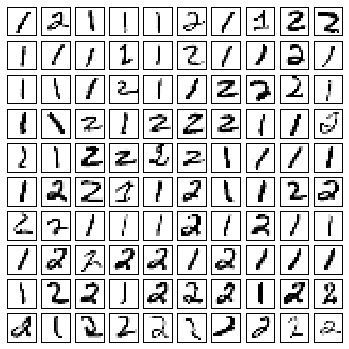

In [7]:
fig = plot_mnist_data(training_xs)
mkdir('plots')
fig.savefig('plots/mnist12.pdf', bbox_inches='tight',)

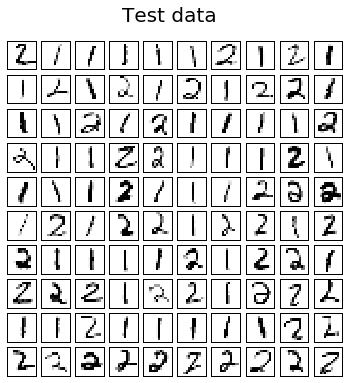

In [8]:
fig = plot_mnist_data(test_xs, 'Test data')


### Define diverse plotting utils

In [9]:
import matplotlib
p_cmap = 'magma_r'
probabilities_cmap = matplotlib.cm.get_cmap(p_cmap)

In [10]:
def plot_shaded(vectors, ps, title=None):
    vectors = np.asarray(vectors)
    rows = 4
    cols = 4
    fig, axes = plt.subplots(rows, cols)
    fig.subplots_adjust(hspace=0.001, wspace=0.001)
    image_width = int(np.sqrt(vectors[0].shape[0]))
    for i in range(cols):
        for j in range(rows):
            colored_mnist_subplots(vectors[indeces[j*rows*cols+i]], axes[j,i], image_width, ps[indeces[j*rows*cols+i]])
    fig.set_size_inches(3, 3)
    ax1 = fig.add_axes([0.92, 0.12, 0.055, 0.78])


    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    cb1 = matplotlib.colorbar.ColorbarBase(ax1,
        cmap='magma',
        norm=norm,
    orientation='vertical')
    cb1.set_label(r'$P(C=1)$')
    if title is not None:
        fig.suptitle(title)
    #fig.set_tight_layout(True)
    return fig, axes

In [11]:
def get_color_from_probability(p, color_levels=100):
    colormap = sns.color_palette("magma_r", color_levels)
    for i,val in enumerate(np.linspace(0,1,color_levels)):
        if p<=val:
            break
    return colormap[i]

In [12]:
def colored_mnist_subplots(vector, ax, image_width, p):
    vector[vector!=-1] = 1
    image = np.reshape(vector, (image_width, image_width))
    binary_cmap_list  =[(1, 1, 1), get_color_from_probability(p)]
    #binary_cmap_list  =[(1, 1, 1), (0.5, 0.5, 0.5)]
    cmap = plt.cm.jet
    binary_cmap = cmap.from_list('Custom cmap', binary_cmap_list, 2)
    imgplot = ax.imshow(image, cmap=binary_cmap)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
def get_result_data():
    result_files = glob.glob('results/*.json')
    return [read_json(filename) for filename in result_files]

In [14]:
results = get_result_data()

In [15]:
def get_all_results_for(prog, t):
    pattern = {'inf-prog-name': prog, 'timing': t}
    return [result for result in results if not violates_pattern(result, pattern)]

In [16]:
def get_class_ps(prog_results):
    return np.mean(np.asarray([res['learned-parameters']['class-p'] for res in prog_results]), axis=0)

In [17]:
import seaborn as sns

In [18]:
T = 60 * 20

### Grep all the results.

In [19]:
 single_site_results = get_all_results_for('single_site_mh', T)
resimulation_results = get_all_results_for('resimulation_mh', T)

### Find results where resimulation does badly.

In [20]:
mean_acc_rs = np.mean(np.asarray(
    [
        res['learned-parameters']['individual-accuracy']
        for res in resimulation_results
    ]
), axis=0)

In [21]:
indeces = np.argsort(mean_acc_rs)

### Get the relevant class probabilities

In [22]:
ss_probs = get_class_ps(single_site_results)
rs_probs = get_class_ps(resimulation_results)

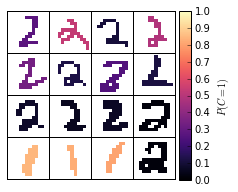

In [23]:
fig, ax = plot_shaded(test_xs, ss_probs)
mkdir('plots')
fig.savefig('plots/trace-single-site.pdf', bbox_inches='tight',)

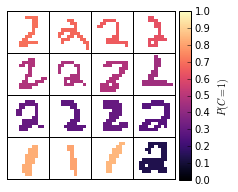

In [24]:
fig, ax = plot_shaded(test_xs, rs_probs)
mkdir('plots')
fig.savefig('plots/trace-resimulation.pdf', bbox_inches='tight',)